In [1]:
import cv2
import numpy as np
import os
import re
from matplotlib import pyplot as plt
from sklearn.cluster import DBSCAN

In [2]:
def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150)
    return edges

def detect_keyboard(image):
    edges = preprocess_image(image)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Assuming the keyboard is the largest rectangle
    # keyboard_contour = max(contours, key=cv2.contourArea)
    # return keyboard_contour
    return contours

[[[1012  904]]

 [[1006  910]]

 [[1006  911]]

 [[1004  913]]

 [[1004  914]]

 [[1001  917]]

 [[1001  918]]

 [[ 999  920]]

 [[ 999  921]]

 [[ 995  925]]

 [[ 995  926]]

 [[ 993  928]]

 [[ 993  929]]

 [[ 991  931]]

 [[ 991  932]]

 [[ 988  935]]

 [[ 988  936]]

 [[ 986  938]]

 [[ 986  939]]

 [[ 984  941]]

 [[ 984  943]]

 [[ 983  944]]

 [[ 982  944]]

 [[ 982  945]]

 [[ 984  943]]

 [[ 984  942]]

 [[ 986  940]]

 [[ 986  939]]

 [[ 988  937]]

 [[ 988  936]]

 [[ 991  933]]

 [[ 991  932]]

 [[ 993  930]]

 [[ 993  929]]

 [[ 995  927]]

 [[ 995  926]]

 [[ 999  922]]

 [[ 999  921]]

 [[1001  919]]

 [[1001  918]]

 [[1004  915]]

 [[1004  914]]

 [[1006  912]]

 [[1006  911]]

 [[1010  907]]

 [[1010  906]]

 [[1011  905]]

 [[1012  905]]]
[[[822 898]]

 [[820 900]]

 [[820 901]]

 [[819 902]]

 [[819 903]]

 [[817 905]]

 [[817 906]]

 [[814 909]]

 [[815 910]]

 [[814 911]]

 [[813 911]]

 [[814 912]]

 [[814 914]]

 [[816 914]]

 [[816 913]]

 [[817 912]]

 [[817 9

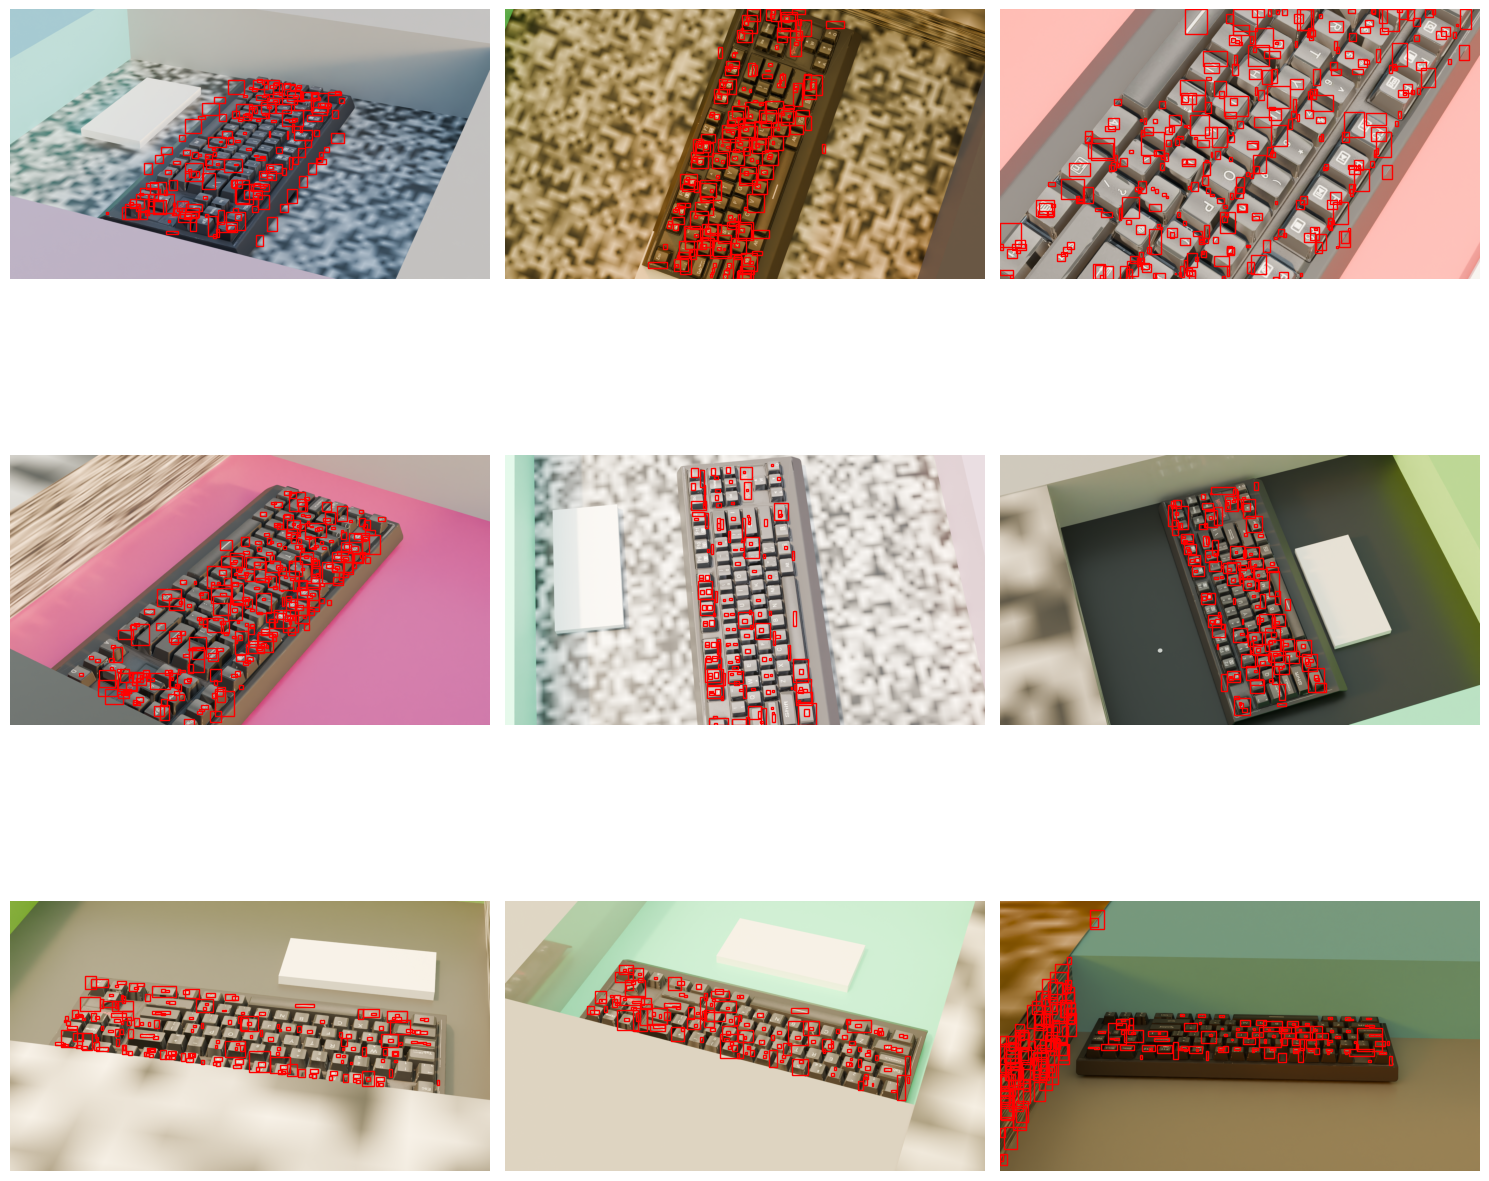

In [7]:
images_path = os.path.join("..", "data_generation", "data", "final_renders")
all_images = os.listdir(images_path)
images = [img for img in all_images if re.search("Image", img)]

outputs = []
keyboard_countours = []
for img in images:
    image = cv2.imread(os.path.join(images_path, img))
    contours = detect_keyboard(image)
    #filtered_contours = [cnt for cnt in contours if 5 < cv2.contourArea(cnt) < 1000]
    filtered_contours = [cnt for cnt in contours if
                         5 < cv2.boundingRect(cnt)[2] < 100 and
                         5 < cv2.boundingRect(cnt)[3] < 100 and
                         5 < cv2.contourArea(cnt) < 1000]
    
    centroids = []
    for cnt in filtered_contours:
        print(cnt)
        M = cv2.moments(cnt)
        if M["m00"] != 0:  # Avoid division by zero
            cx = int(M["m10"] / M["m00"])
            cy = int(M["m01"] / M["m00"])
            centroids.append([cx, cy])
    db = DBSCAN(eps=200, min_samples=5).fit(centroids)
    labels = db.labels_

    # Find the largest cluster (ignoring noise: label -1)
    unique_labels, counts = np.unique(labels[labels != -1], return_counts=True)
    largest_cluster_label = unique_labels[np.argmax(counts)]

    # Mask for contours in the largest cluster
    selected_contours = []
    for i, label in enumerate(labels):
        if label == largest_cluster_label:
            selected_contours.append(filtered_contours[i])

    # Draw the selected contours
    output_image = image.copy()
    # cv2.drawContours(output_image, selected_contours, -1, (0, 255, 0), 2)

    outputs.append([output_image, selected_contours])
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for i in range(9):
    if i < len(outputs):
        axes[i].imshow(cv2.cvtColor(outputs[i][0], cv2.COLOR_BGR2RGB))
        axes[i].axis('off')
        for cnt in outputs[i][1]:
            rect = cv2.boundingRect(cnt)
            x, y, w, h = rect
            axes[i].add_patch(plt.Rectangle((x, y), w, h, edgecolor='red', facecolor='none'))
    else:
        axes[i].axis('off')

plt.tight_layout()
plt.show()


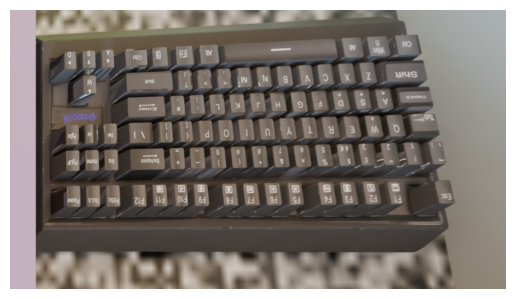

In [16]:
import cv2

width = 1920/1.3  # Target width of the rectangle
height = 1080/1.3  # Target height of the rectangle
dst_points = np.array([[100 + width, 100], [100 + width, 100 + height], [100, 100 + height], [100, 100]], dtype="float32")

# Compute the homography matrix
matrix, _ = cv2.findHomography(points, dst_points)

# Apply the perspective warp to the image using the homography
transformed_image = cv2.warpPerspective(img_t, matrix, (img_t.shape[1], img_t.shape[0]))

# Display the result
plt.imshow(cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
